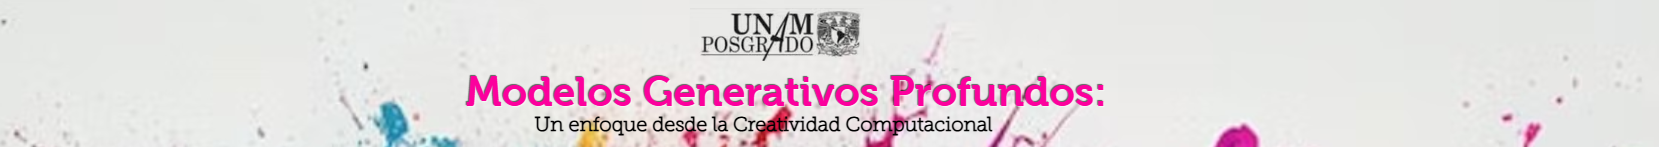

# Perceptrón Multicapa (MLP) para clasificar las imágenes de MNIST



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, utils, datasets

## 1. Preparar los datos

**1.1 Descargar el dataset**

In [2]:

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**1.2 Escalar los valores de las imágenes**


In [4]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

**1.3 Codificar las etiquetas con one-hot-encoding.**


In [5]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

Veamos las primeras 10 imágenes del conjunto de entrenamiento junto con sus etiquetas codificadas usando one-hot encoding.

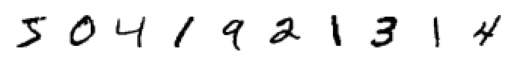

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
images = x_train[:10]

plt.figure()
for i in range(0, len(images)):
  plt.subplot(1, 10, i + 1)
  plt.imshow(images[i], cmap="gray_r")
  plt.axis("off")

plt.show()

print(y_train[:10])

## 2. Construir el modelo <a name="build"></a>

In [7]:
NUM_CLASES = 10
input_layer = layers.Input(shape=(28, 28,1))
x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)
output_layer = layers.Dense(NUM_CLASES, activation="softmax")(x)

model = models.Model(inputs=input_layer, outputs=output_layer)

Podemos utilizar el método <b>model.summary()</b> para inspeccionar la forma de la red en cada capa.

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,660 (736.95 KB)

 Trainable params: 188,660 (736.95 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Compilar el modelo <a name="compile"></a>

In [9]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

## 4. Entrenar el modelo <a name="train"></a>

In [10]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8697 - loss: 0.4580
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1095
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9791 - loss: 0.0688
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9861 - loss: 0.0463
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9898 - loss: 0.0345
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9913 - loss: 0.0262
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9938 - loss: 0.0203
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9941 - loss: 0.0177
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9968 - loss: 0.0117
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0144


## 5. Evaluar el modelo

In [11]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.1030


[0.08903559297323227, 0.9779999852180481]

Podemos observar algunas de las predicciones en el conjunto de prueba utilizando el <b>método predict</b>: <br>


In [12]:
CLASSES = np.array(
    [
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Podemos visualizar algunas de las imágenes junto con sus etiquetas y predicciones utilizando el siguiente código:

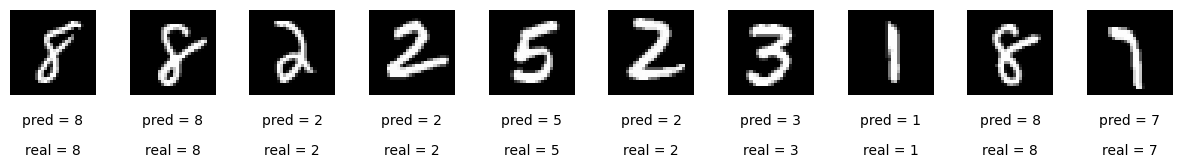

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]

    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")

    ax.text(
        0.5, -0.35, f"pred = {preds_single[idx]}",
        fontsize=10, ha="center", transform=ax.transAxes
    )
    ax.text(
        0.5, -0.7, f"real = {actual_single[idx]}",
        fontsize=10, ha="center", transform=ax.transAxes
    )

    # Mostrar las 10 imágenes
    ax.imshow(img, cmap="gray")


##6. Mostremos la variabilidad de las imágenes

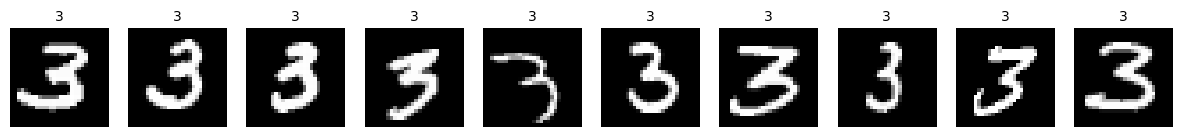

In [14]:
# Filtrar índices de dígito = 3
#indices_3 = np.where(y_train == 3)[0]
indices_3 = np.where(np.argmax(y_train, axis=1) == 3)[0]

# Elegir 10 al azar
sample_indices = np.random.choice(indices_3, 10, replace=False)

# Mostrar imágenes
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, idx in enumerate(sample_indices):
    axes[i].imshow(x_train[idx], cmap="gray", vmin=0, vmax=1)
    axes[i].axis("off")
    axes[i].set_title("3", fontsize=10)
plt.show()


## 7. ¿Qué pasa si transladamos las imágenes de prueba cuatro pixeles abajo y  la derecha y un pixel abajo?

Hagámoslo primero con una sola imagen.

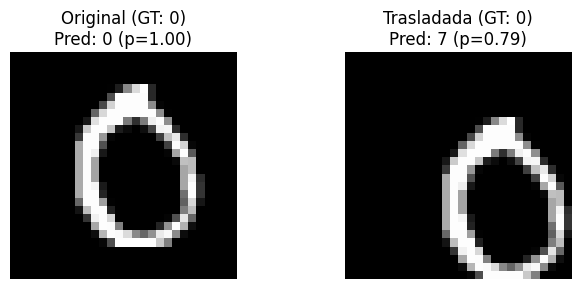

In [15]:
from scipy.ndimage import shift

# 1) Seleciona una imagen aleatoria del conjunto de prueba
idx = np.random.randint(0, len(x_test))
img = x_test[idx]

# 2) Traslada la imagen (ejemplo: 1 pixeles abajo, 1 derecha)
translated_img = shift(img, shift=(4, 4), mode="constant", cval=0.0, order=0)

# 3) Preparar batch con original y trasladada: (2,28,28,1)
input_imgs = np.stack([img, translated_img], axis=0)[..., np.newaxis].astype("float32")

# 4) Predicción
input_tensor = tf.convert_to_tensor(input_imgs, dtype=tf.float32)
probs = model.predict_on_batch(input_tensor)   # numpy array (2,10)
pred_labels = np.argmax(probs, axis=1)

# 6) Recuperar etiqueta real de forma robusta
true_label = int(np.argmax(y_test[idx]))

# 7) Mostrar lado a lado
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

title0 = f"Original\nPred: {pred_labels[0]} (p={probs[0, pred_labels[0]]:.2f})"
title1 = f"Trasladada\nPred: {pred_labels[1]} (p={probs[1, pred_labels[1]]:.2f})"

#if true_label is not None:
title0 = f"Original (GT: {true_label})\nPred: {pred_labels[0]} (p={probs[0, pred_labels[0]]:.2f})"
title1 = f"Trasladada (GT: {true_label})\nPred: {pred_labels[1]} (p={probs[1, pred_labels[1]]:.2f})"

axes[0].imshow(img, cmap="gray")
axes[0].set_title(title0)
axes[0].axis("off")

axes[1].imshow(translated_img, cmap="gray")
axes[1].set_title(title1)
axes[1].axis("off")

plt.tight_layout()
plt.show()


Traslademos ahora con todas las imágenes de x_test y veamos cómo cambia el desempeño del modelo.

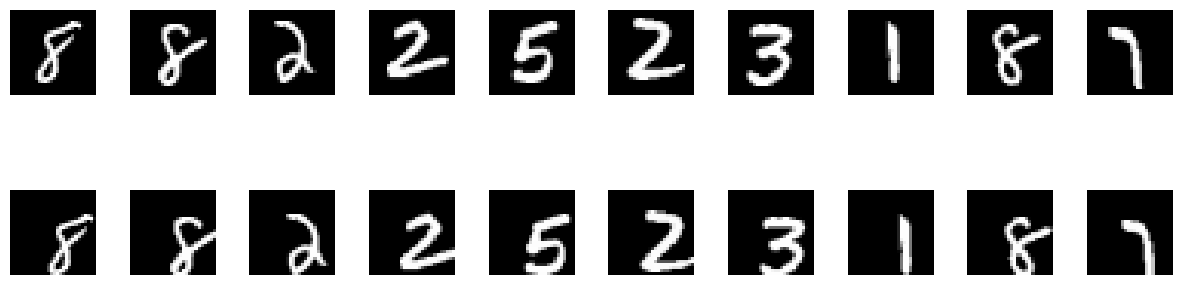

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0801 - loss: 14.3838


[15.374662399291992, 0.07559999823570251]

In [16]:
import numpy as np
from scipy.ndimage import shift

# Aplicar shift a todas las imágenes
x_test_shifted = np.stack([
    shift(img, shift=(4, 4), mode="constant", cval=0.0, order=0)
    for img in x_test
], axis=0)

# Muestra 10 imágenes aleatorias: arriba originales, abajo trasladadas
fig, axes = plt.subplots(2, n_to_show, figsize=(15, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    # Imagen original
    axes[0, i].imshow(x_test[idx].squeeze(), cmap="gray")
    axes[0, i].axis("off")

    # Imagen trasladada
    axes[1, i].imshow(x_test_shifted[idx].squeeze(), cmap="gray")
    axes[1, i].axis("off")

plt.show()


# --- Pasar al modelo ---
model.evaluate(x_test_shifted, y_test)